In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing


def draw_data(data, title=''):
    n_bins = 20
    fig, axs = plt.subplots(2, 3)
    axs[0, 0].hist(data[:, 0], bins=n_bins)
    axs[0, 0].set_title('age')
    axs[0, 1].hist(data[:, 1], bins=n_bins)
    axs[0, 1].set_title('creatinine_phosphokinase')
    axs[0, 2].hist(data[:, 2], bins=n_bins)
    axs[0, 2].set_title('ejection_fraction')
    axs[1, 0].hist(data[:, 3], bins=n_bins)
    axs[1, 0].set_title('platelets')
    axs[1, 1].hist(data[:, 4], bins=n_bins)
    axs[1, 1].set_title('serum_creatinine')
    axs[1, 2].hist(data[:, 5], bins=n_bins)
    axs[1, 2].set_title('serum_sodium')
    plt.suptitle(title)
    plt.show()

In [2]:
# Загрузка данных

In [3]:
# 1. Загрузить датасет по ссылке: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data . Данные представлены в виде csv таблицы.
# 2. Создать Python скрипт. Загрузить датасет в датафрейм, и исключить бинарные признаки и признак времени.
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df = df.drop(columns=['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'time', 'DEATH_EVENT'])
df

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
0,75.0,582,20,265000.00,1.9,130
1,55.0,7861,38,263358.03,1.1,136
2,65.0,146,20,162000.00,1.3,129
3,50.0,111,20,210000.00,1.9,137
4,65.0,160,20,327000.00,2.7,116
...,...,...,...,...,...,...
294,62.0,61,38,155000.00,1.1,143
295,55.0,1820,38,270000.00,1.2,139
296,45.0,2060,60,742000.00,0.8,138
297,45.0,2413,38,140000.00,1.4,140


In [4]:
# 5. Так как библиотека Sklearn работает с NumPy массива, то преобразуйте датафрейм к
# двумерному массиву NumPy, где строка соответствует наблюдению, а столбец признаку
data = df.to_numpy(dtype='float')

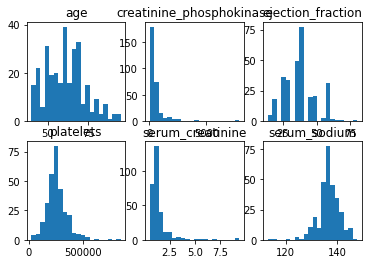

In [5]:
# 3. Построить гистограммы признаков
draw_data(data)

In [6]:
# 4. На основании гистограмм определите диапазоны значений для каждого из признаков, а
# также возле какого значения лежит наибольшее количество наблюдений. 


In [7]:
# Стандартизация данных

In [8]:
# 1. Подключите модуль Sklearn. Настройте стандартизацию на основе первых 150 наблюдений
# используя StandardScaler
scaler_150 =  preprocessing.StandardScaler().fit(data[:150,:])

In [9]:
# 2. Стандартизуйте все данные
scaler = preprocessing.StandardScaler()
data_scaled = scaler.fit_transform(data[:150, :])

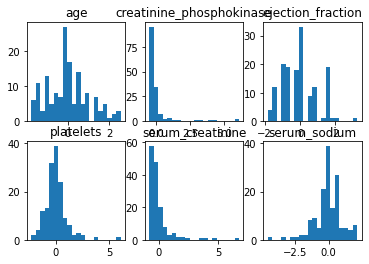

In [10]:
# 3. Постройте гистограммы стандартизированных данных
draw_data(data_scaled)

In [11]:
# 4. Сравните данные до и после стандартизации. Опишите, что изменилось и почему

In [12]:
# 5. Рассчитайте мат. ожидание и СКО до 
mean, std = np.mean(data, axis=0), np.std(data, axis=0)
mean, std

(array([6.08338930e+01, 5.81839465e+02, 3.80836120e+01, 2.63358029e+05,
        1.39387960e+00, 1.36625418e+02]),
 array([1.18749014e+01, 9.68663967e+02, 1.18150335e+01, 9.76405477e+04,
        1.03277867e+00, 4.40509238e+00]))

In [13]:
# и после стандартизации. 
np.mean(data_scaled, axis=0), np.std(data_scaled, axis=0), 

(array([ 1.30266168e-16,  2.36847579e-17,  1.18423789e-16,  8.88178420e-17,
        -1.30266168e-16, -3.06717614e-15]),
 array([1., 1., 1., 1., 1., 1.]))

In [14]:
# На основании этих значений выведите для каждого признака формулы по которым они стандартизировались.
for i in range(len(mean)):
    print('z = (x - ', mean[i], ') / ', std[i], sep='')

z = (x - 60.83389297658862) / 11.874901429842655
z = (x - 581.8394648829432) / 968.6639668032415
z = (x - 38.08361204013378) / 11.815033462318585
z = (x - 263358.02926421404) / 97640.54765451424
z = (x - 1.3938795986622072) / 1.0327786652795918
z = (x - 136.62541806020067) / 4.405092379513557


In [15]:
# 6. Сравните значений из формул с полями mean_ и var_ объекта scaler
scaler.mean_, scaler.var_**(1/2)

(array([6.29466667e+01, 6.07153333e+02, 3.79466667e+01, 2.66746749e+05,
        1.52060000e+00, 1.36453333e+02]),
 array([1.24497854e+01, 1.18974318e+03, 1.30393183e+01, 9.61917902e+04,
        1.16641630e+00, 4.53958393e+00]))

In [33]:
# 7. Проведите настройку стандартизации на всех данных и сравните с результатами настройки
# на основании 150 наблюдений
scaler_150.mean_, scaler_150.var_**(1/2)

(array([6.29466667e+01, 6.07153333e+02, 3.79466667e+01, 2.66746749e+05,
        1.52060000e+00, 1.36453333e+02]),
 array([1.54997156e+02, 1.41548882e+06, 1.70023822e+02, 9.25286050e+09,
        1.36052697e+00, 2.06078222e+01]))

In [17]:
# Приведение к диапазону

In [18]:
# 1. Приведите данные к диапазону используя MinMaxScaler
scaler = preprocessing.MinMaxScaler()

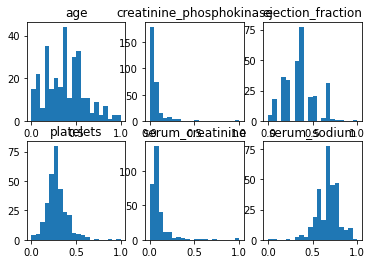

In [19]:
# 2. Постройте гистограммы для признаков и сравните с исходными данными
draw_data(scaler.fit_transform(data))

In [20]:
# 3. Через параметры MinMaxScaler определите минимальное и максимальное значение в
# данных для каждого признака
scaler.data_min_, scaler.data_max_

(array([4.00e+01, 2.30e+01, 1.40e+01, 2.51e+04, 5.00e-01, 1.13e+02]),
 array([9.500e+01, 7.861e+03, 8.000e+01, 8.500e+05, 9.400e+00, 1.480e+02]))

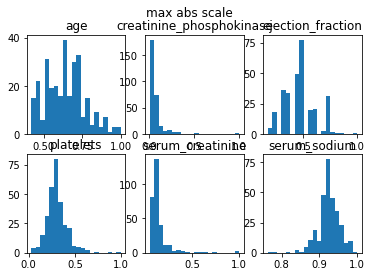

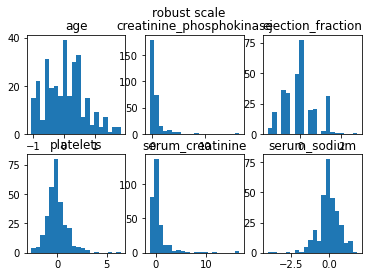

In [21]:
# 4. Аналогично трансформируйте данные используя MaxAbsScaler и RobustScaler. Постройте
# гистограммы. Определите к какому диапазону приводятся данные.
draw_data(preprocessing.MaxAbsScaler().fit_transform(data), 'max abs scale')
draw_data(preprocessing.RobustScaler().fit_transform(data), 'robust scale')


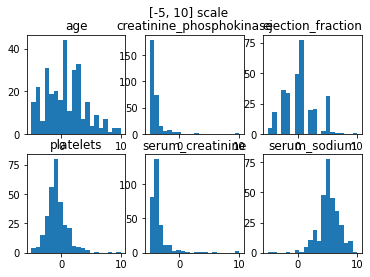

In [22]:
# 5. Напишите функцию, которая приводит все данные к диапазону [-5 10]
draw_data(preprocessing.MinMaxScaler(feature_range=[-5, 10]).fit_transform(data), '[-5, 10] scale')


In [23]:
# Нелинейные преобразования

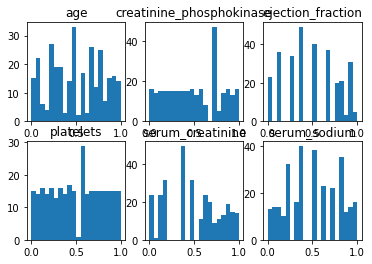

In [24]:
# 1. Приведите данные к равномерному распределению используя QuantileTransformer
# 2. Постройте гистограммы и сравните с исходными данными
draw_data(preprocessing.QuantileTransformer(n_quantiles=100, random_state=0).fit_transform(data),)

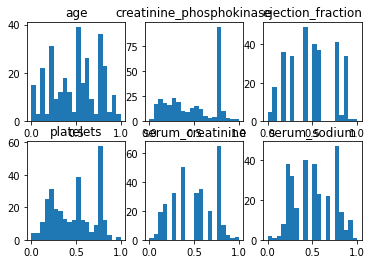

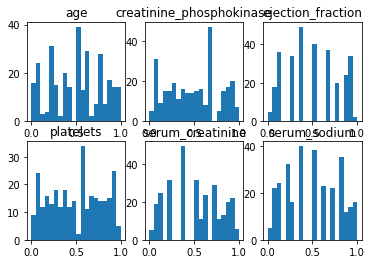

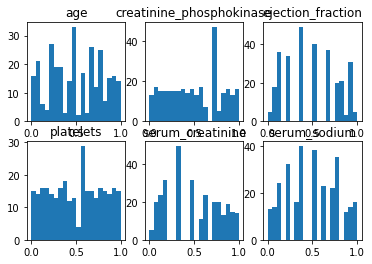

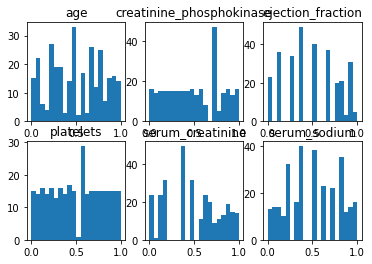

In [25]:
# 3. Определите, как и на что влияет значение параметра n_quantiles
draw_data(preprocessing.QuantileTransformer(n_quantiles=5, random_state=0).fit_transform(data))
draw_data(preprocessing.QuantileTransformer(n_quantiles=15, random_state=0).fit_transform(data))
draw_data(preprocessing.QuantileTransformer(n_quantiles=30, random_state=0).fit_transform(data))
draw_data(preprocessing.QuantileTransformer(n_quantiles=100, random_state=0).fit_transform(data))


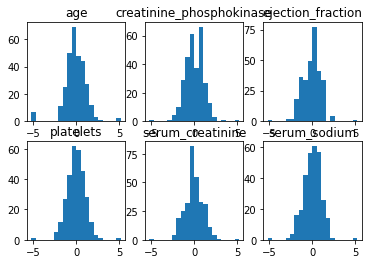

In [26]:
# 4. Приведите данные к нормальному распределению передав в QuantileTransformer параметр
# output_distribution=‘normal’
# 5. Постройте гистограммы и сравните с исходными данными
draw_data(preprocessing.QuantileTransformer(n_quantiles=100, random_state=0, output_distribution='normal').fit_transform(data))


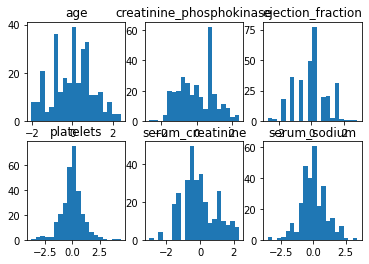

In [27]:
# 6. Самостоятельно приведите данные к нормальному распределению используя
# PowerTransformer
draw_data(preprocessing.PowerTransformer().fit_transform(data))

In [28]:
# Дискретизация признаков

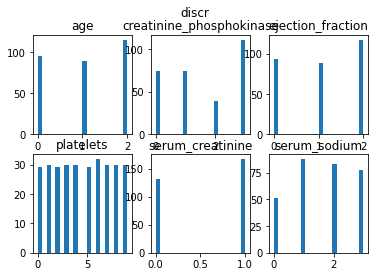

In [29]:
# 1. Проведите дискретизацию признаков, используя KBinsDiscretizer, на следующее
# количество диапазонов:
#  age - 3
#  creatinine_phosphokinase - 4
#  ejection_fraction - 3
#  platelets - 10
#  serum_creatinine - 2
#  serum_sodium - 4
# 2. Постройте гистограммы. Объясните полученные результаты
discretizer = preprocessing.KBinsDiscretizer(n_bins=[3, 4, 3, 10, 2, 4], encode='ordinal')
draw_data(discretizer.fit_transform(data), 'discr')

In [30]:
# 3. Через параметр bin_edges_ выведите диапазоны каждого интервала для каждого признака
discretizer.bin_edges_

array([array([40., 55., 65., 95.]),
       array([  23. ,  116.5,  250. ,  582. , 7861. ]),
       array([14., 35., 40., 80.]),
       array([ 25100., 153000., 196000., 221000., 237000., 262000., 265000.,
       285200., 319800., 374600., 850000.]),
       array([0.5, 1.1, 9.4]), array([113., 134., 137., 140., 148.])],
      dtype=object)